Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("3.csv")

In [2]:
from sklearn.linear_model import LogisticRegression
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.929920,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,233.928740,132.352407,82.893464,25.686331,75.861019,74.462482,0.151958
std,0.495022,8.572160,1.053018,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,51.169478,22.038097,11.910850,4.420935,12.081533,32.869879,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [3]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [4]:
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [5]:
data["TenYearCHD"]

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

<Axes: xlabel='TenYearCHD'>

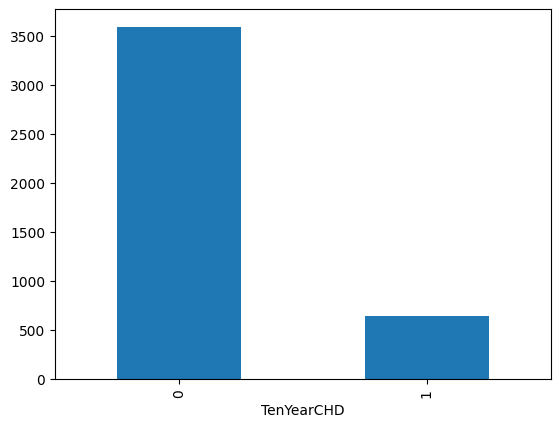

In [6]:
data["TenYearCHD"].value_counts().plot(kind="bar")

In [7]:
x=data.drop(columns="TenYearCHD", axis = 1)
y = data["TenYearCHD"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.25, random_state = 14)

In [8]:
print("X Train", x_train.shape)


X Train (3178, 15)


In [18]:
print("Y Train", y_train.shape)


Y Train (3178,)


In [19]:
print("X Test", x_test.shape)


X Test (1060, 15)


In [11]:
print("Y Test", y_test)

Y Test 132     0
3818    0
2746    1
1377    0
4196    0
       ..
3119    0
3919    0
3852    0
1187    0
82      0
Name: TenYearCHD, Length: 1060, dtype: int64


In [12]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred_test = logreg.predict(x_test)

In [14]:
y_pred_train = logreg.predict(x_train)

In [15]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       906
           1       0.56      0.03      0.06       154

    accuracy                           0.86      1060
   macro avg       0.71      0.51      0.49      1060
weighted avg       0.81      0.86      0.80      1060



In [16]:
print(accuracy_score(y_test,y_pred_test))

0.8556603773584905


In [17]:
print(accuracy_score(y_train,y_pred_train))

0.8486469477658904
